___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [3]:
# CODE HERE
df = pd.read_csv('../DATA/Frozen_Dessert_Production.csv',index_col='DATE', parse_dates=True)
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**Task: Change the column name to Production**

In [4]:
#bad approach
# df.columns('IPN31152N':'Production')
df['Production'] = df['IPN31152N']
df

,IPN31152N,Production
DATE,,
1972-01-01,59.9622,59.9622
1972-02-01,67.0605,67.0605
1972-03-01,74.2350,74.2350
1972-04-01,78.1120,78.1120
1972-05-01,84.7636,84.7636
...,...,...
2019-05-01,114.5613,114.5613
2019-06-01,124.9605,124.9605
2019-07-01,110.2632,110.2632


In [5]:
df = df.drop('IPN31152N', axis=1)
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [6]:
#good approach df.reanme(columns={"a":"b"})
df.rename(columns={'IPN31152N':'Production'},inplace=True) #w/o inplace=True , it works
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**TASK: Plot out the time series**

[plt.show() Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)

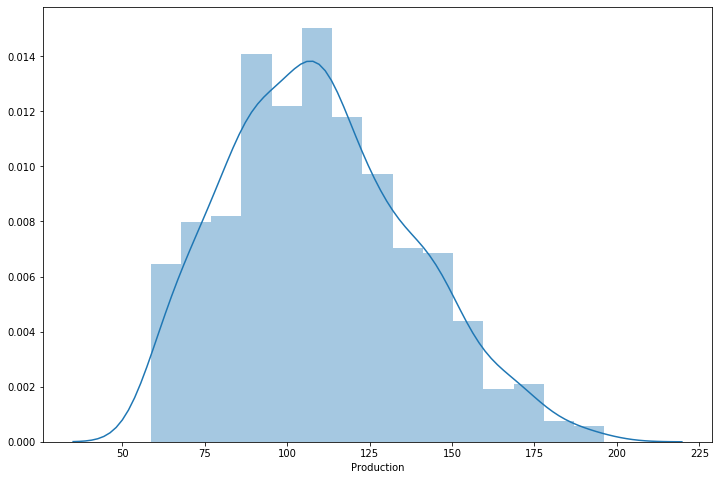

In [7]:
import seaborn as sns
#CODE HERE
plt.figure(figsize=(12, 8))
# sns.distplot(df['Production'], kde=False)
sns.distplot(df['Production'])

Text(0, 0.5, 'Production')

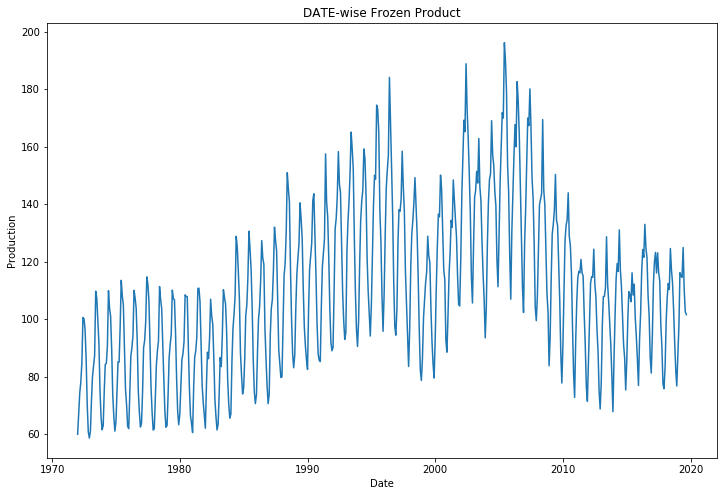

In [8]:
# plt.figure(figsize=(12, 8))
# df.plot(figsize=(12, 8))

# df.plot(figsize=(12, 8))

# plt.figure(figsize=(12, 8))
# plt.plot(df)

plt.figure(figsize=(12, 8))
plt.plot(df['Production']) #same as above

plt.title('DATE-wise Frozen Product')
plt.xlabel('Date')
plt.ylabel('Production')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Production,573.0,109.895545,27.950571,58.6598,88.9355,107.643,128.2777,196.1737


## Train Test Split

**TASK: Figure out the length of the data set**

In [10]:
#CODE HERE
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [11]:
#CODE HERE
test_size = 24
test_ind = len(df) - test_size
test_ind

549

In [12]:
train = df[:test_ind]
test = df[test_ind:]

In [13]:
print("train length : ",len(train))
print("test length : ",len(test))

train length :  549
test length :  24


## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [14]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_test #np.array with 2-d , 24

array([[0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899],
       [0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [18]:
print(scaled_train.shape)
print(scaled_test.shape)

(549, 1)
(24, 1)


In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#CODE HERE
length = 18 #test length is 24
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)#(len:549, len:549,28,1)

In [21]:
print(len(generator)) #(549-18)/1 = 531
X, y = generator[0]

531


In [22]:
X #18

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ],
        [0.01774221],
        [0.09850931],
        [0.15590133],
        [0.18358944],
        [0.20878908],
        [0.37150354]]])

In [23]:
y

array([[0.3542551]])

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
n_features = 1

In [26]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features))) #(18,1)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') #continuous variables

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [28]:
# CODE HERE
len(scaled_test)

24

In [29]:
print("your length chosen for your batches : ",length)

your length chosen for your batches :  18


**TASK: Create an EarlyStopping callback based on val_loss.**

In [30]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

##### Create validation generator

In [32]:
# CODE HERE
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1) 

In [33]:
len(validation_generator) #(24-18)/1 = 6, : length of test(24) - length(18)

6

In [34]:
X_vg, y_vg = validation_generator[0]

In [35]:
print(X_vg.shape)
X_vg #18 

(1, 18, 1)


array([[[0.23134679],
        [0.13655347],
        [0.12472921],
        [0.18015997],
        [0.29691617],
        [0.35382169],
        [0.39102302],
        [0.37592272],
        [0.47940099],
        [0.42586022],
        [0.3928192 ],
        [0.32470899],
        [0.2434103 ],
        [0.17289089],
        [0.13163033],
        [0.20608099],
        [0.28689318],
        [0.41822681]]])

In [36]:
y_vg

array([[0.40948951]])

In [37]:
model.fit_generator(generator, epochs = 20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
531/531 [==============================] - 26s 50ms/step - loss: 0.0309 - val_loss: 0.0156
Epoch 2/20
531/531 [==============================] - 27s 50ms/step - loss: 0.0129 - val_loss: 0.0016
Epoch 3/20
531/531 [==============================] - 27s 50ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 4/20
531/531 [==============================] - 27s 51ms/step - loss: 0.0039 - val_loss: 0.0035


**TASK: Plot the history of the loss that occured during training.**

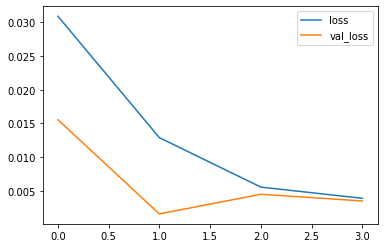

In [38]:
# CODE HERE
loss = pd.DataFrame(model.history.history)
loss.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [41]:
len(test)

24

In [44]:
first_eval_batch = scaled_train[-length:] #[-18:]
my_first_eval_batch = first_eval_batch.reshape(1,length,n_features) #(1,18,1)
my_first_eval_batch

array([[[0.4766849 ],
        [0.45728977],
        [0.54050318],
        [0.48134479],
        [0.45575247],
        [0.35906261],
        [0.31068714],
        [0.20365141],
        [0.16432593],
        [0.2587782 ],
        [0.39071032],
        [0.44387077],
        [0.4695409 ],
        [0.41743926],
        [0.46851409],
        [0.41889656],
        [0.39641011],
        [0.28544533]]])

In [45]:
# To forecast predictions for your test data range (the last 12 months of the entire dataset), First,
# one prediction by current_batch(1,18,1) <-first_eval_batch(18,1) <- scaled_train[index -18 to end] : #18 
#Then add it test_predictions, list. 

test_predictions =[]

first_eval_batch = scaled_train[-length:] #[-18:]
print(first_eval_batch.shape)
current_batch = first_eval_batch.reshape(1,length,n_features) #(1,18,1)
print(current_batch.shape)

for i in range(len(test)): #24 
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    # model.predict(current_batch)[0], 1-d array(1,)[0.25642183] <-
    # <- model.predict(current_batch),2d (1,1)[[0.25642183]]
    current_pred = model.predict(current_batch)[0]
    print(f"*index {i}: current_pred : {model.predict(current_batch)[0]}")
    print('----------store the prediction to test_predictions------------')
    # store prediction 
    test_predictions.append(current_pred) #list consist 18 np.array(1,)
    print(f"*test_predictions : \n",test_predictions)
    print("---------drop first value & append the prediction----------")
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #[[[0.25642183]]], 3-d(1,1,1)
    print("current_batch :\n", current_batch) #18
    print("****************************************")
    

(18, 1)
(1, 18, 1)
*index 0: current_pred : [0.2697693]
----------store the prediction to test_predictions------------
*test_predictions : 
 [array([0.2697693], dtype=float32)]
---------drop first value & append the prediction----------
current_batch :
 [[[0.45728977]
  [0.54050318]
  [0.48134479]
  [0.45575247]
  [0.35906261]
  [0.31068714]
  [0.20365141]
  [0.16432593]
  [0.2587782 ]
  [0.39071032]
  [0.44387077]
  [0.4695409 ]
  [0.41743926]
  [0.46851409]
  [0.41889656]
  [0.39641011]
  [0.28544533]
  [0.26976931]]]
****************************************
*index 1: current_pred : [0.21586047]
----------store the prediction to test_predictions------------
*test_predictions : 
 [array([0.2697693], dtype=float32), array([0.21586047], dtype=float32)]
---------drop first value & append the prediction----------
current_batch :
 [[[0.54050318]
  [0.48134479]
  [0.45575247]
  [0.35906261]
  [0.31068714]
  [0.20365141]
  [0.16432593]
  [0.2587782 ]
  [0.39071032]
  [0.44387077]
  [0.469540

*index 12: current_pred : [0.26611418]
----------store the prediction to test_predictions------------
*test_predictions : 
 [array([0.2697693], dtype=float32), array([0.21586047], dtype=float32), array([0.19443238], dtype=float32), array([0.27248383], dtype=float32), array([0.37693977], dtype=float32), array([0.44928372], dtype=float32), array([0.4924894], dtype=float32), array([0.51900333], dtype=float32), array([0.51250696], dtype=float32), array([0.47213644], dtype=float32), array([0.40548408], dtype=float32), array([0.33252078], dtype=float32), array([0.26611418], dtype=float32)]
---------drop first value & append the prediction----------
current_batch :
 [[[0.41743926]
  [0.46851409]
  [0.41889656]
  [0.39641011]
  [0.28544533]
  [0.26976931]
  [0.21586047]
  [0.19443238]
  [0.27248383]
  [0.37693977]
  [0.44928372]
  [0.4924894 ]
  [0.51900333]
  [0.51250696]
  [0.47213644]
  [0.40548408]
  [0.33252078]
  [0.26611418]]]
****************************************
*index 13: current_

*index 21: current_pred : [0.5222795]
----------store the prediction to test_predictions------------
*test_predictions : 
 [array([0.2697693], dtype=float32), array([0.21586047], dtype=float32), array([0.19443238], dtype=float32), array([0.27248383], dtype=float32), array([0.37693977], dtype=float32), array([0.44928372], dtype=float32), array([0.4924894], dtype=float32), array([0.51900333], dtype=float32), array([0.51250696], dtype=float32), array([0.47213644], dtype=float32), array([0.40548408], dtype=float32), array([0.33252078], dtype=float32), array([0.26611418], dtype=float32), array([0.21760939], dtype=float32), array([0.23511823], dtype=float32), array([0.34075785], dtype=float32), array([0.4447301], dtype=float32), array([0.52127486], dtype=float32), array([0.5654563], dtype=float32), array([0.5872664], dtype=float32), array([0.57501286], dtype=float32), array([0.5222795], dtype=float32)]
---------drop first value & append the prediction----------
current_batch :
 [[[0.37693977

In [ ]:
##Test !
current_batch #nd.array 18 -> first element is removed, then append new element(current_pred) to test_predictions.

In [ ]:
current_batch[:,1:,:]

In [ ]:
model.predict(current_batch)

In [ ]:
model.predict(current_batch)[0] #current_pred -> test_predictions.append(current_pred)

#### Inverse Transformation and Compare

In [159]:
test_predictions #24 

[array([0.25642183], dtype=float32),
 array([0.20720203], dtype=float32),
 array([0.21742652], dtype=float32),
 array([0.29645026], dtype=float32),
 array([0.38803077], dtype=float32),
 array([0.45087326], dtype=float32),
 array([0.49877727], dtype=float32),
 array([0.5275402], dtype=float32),
 array([0.5291007], dtype=float32),
 array([0.49378258], dtype=float32),
 array([0.43755633], dtype=float32),
 array([0.36426324], dtype=float32),
 array([0.28672916], dtype=float32),
 array([0.23425336], dtype=float32),
 array([0.24910472], dtype=float32),
 array([0.34249038], dtype=float32),
 array([0.43369865], dtype=float32),
 array([0.50074756], dtype=float32),
 array([0.5520378], dtype=float32),
 array([0.5897617], dtype=float32),
 array([0.59524924], dtype=float32),
 array([0.56330234], dtype=float32),
 array([0.5023972], dtype=float32),
 array([0.42289233], dtype=float32)]

In [156]:
true_predictions = scaler.inverse_transform(test_predictions)
print(true_predictions.shape)
true_predictions

(24, 1)


array([[ 93.92136647],
       [ 87.15295954],
       [ 88.55896922],
       [ 99.42583104],
       [112.01942415],
       [120.6611398 ],
       [127.24860767],
       [131.20391126],
       [131.41850297],
       [126.56176831],
       [118.82987691],
       [108.75105828],
       [ 98.08904462],
       [ 90.87289337],
       [ 92.91516201],
       [105.75698718],
       [118.29939336],
       [127.51955009],
       [134.57266746],
       [139.76022792],
       [140.51484386],
       [136.12170139],
       [127.74639552],
       [116.81337386]])

In [162]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


In [163]:
test['Predictions'] = true_predictions

/home/ys/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,93.921366
2017-11-01,77.4378,87.152960
2017-12-01,75.8118,88.558969
2018-01-01,83.4343,99.425831
2018-02-01,99.4899,112.019424
2018-03-01,107.3152,120.661140
2018-04-01,112.4309,127.248608
2018-05-01,110.3544,131.203911
2018-06-01,124.5841,131.418503


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

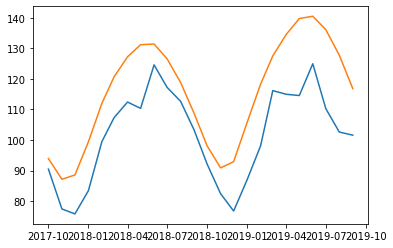

In [165]:
# CODE HERE
plt.plot(test)

**TASK: Calculate your RMSE.**

In [189]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Production'], test['Predictions']))

15.498241705908418

### Retrain and Forecasting

In [166]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)#instead of train, test, Just use whole df dataset

In [ ]:
length = 18 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1) 

In [167]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features))) #n_features = 1
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8
531/531 [==============================] - 30s 57ms/step - loss: 0.0226
Epoch 2/8
531/531 [==============================] - 29s 55ms/step - loss: 0.0063
Epoch 3/8
531/531 [==============================] - 28s 53ms/step - loss: 0.0039
Epoch 4/8
531/531 [==============================] - 30s 56ms/step - loss: 0.0036
Epoch 5/8
531/531 [==============================] - 29s 54ms/step - loss: 0.0035
Epoch 6/8
531/531 [==============================] - 29s 55ms/step - loss: 0.0031
Epoch 7/8
531/531 [==============================] - 29s 55ms/step - loss: 0.0033
Epoch 8/8
531/531 [==============================] - 29s 55ms/step - loss: 0.0032


In [170]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 18

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features)) #pass 1 item per batch, which required at LSTM

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [173]:
forecast = scaler.inverse_transform(forecast)
print("np.array : ",forecast.shape)
forecast

np.array :  (18, 1)


array([[ 90.44723649],
       [ 85.91629706],
       [ 90.0936204 ],
       [100.91467422],
       [112.16517783],
       [120.68337272],
       [126.14910488],
       [128.35170462],
       [126.1993943 ],
       [119.94659638],
       [110.13245807],
       [ 99.06946914],
       [ 90.6792252 ],
       [ 90.68119645],
       [100.41319796],
       [113.31839617],
       [124.21322228],
       [131.94886357]])

#### Creating new timestamp index with pandas.

In [174]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [177]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating dat

In [178]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq='M')
# forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq='MS')

In [179]:
#forecast is np.array
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
2019-10-31,90.447236
2019-11-30,85.916297
2019-12-31,90.093620
2020-01-31,100.914674
2020-02-29,112.165178
2020-03-31,120.683373
2020-04-30,126.149105
2020-05-31,128.351705
2020-06-30,126.199394
2020-07-31,119.946596


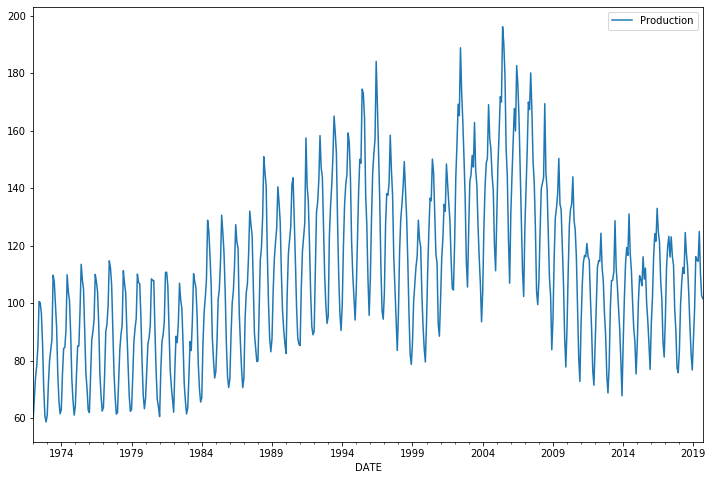

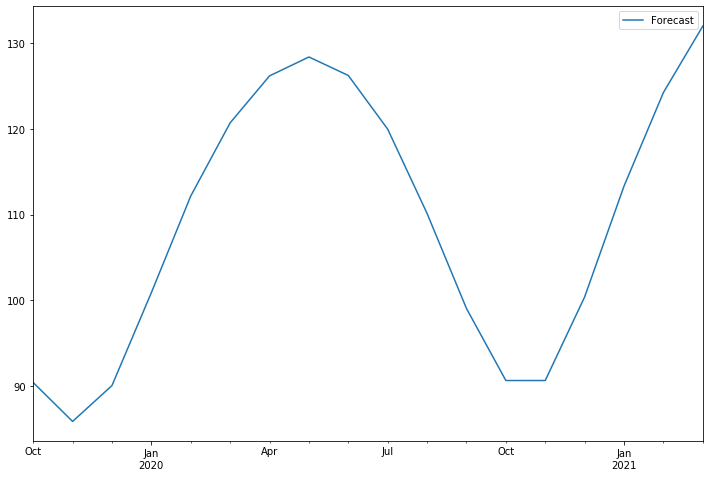

In [183]:
df.plot(figsize=(12, 8))
forecast_df.plot(figsize=(12, 8))

#### Joining pandas plots

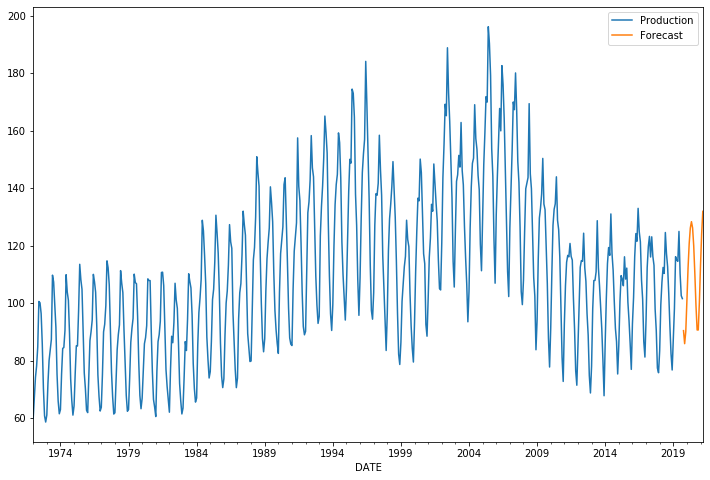

In [184]:
ax = df.plot(figsize=(12, 8))

plt.plot(figsize=(12, 8))
forecast_df.plot(ax=ax)

(573, 614)

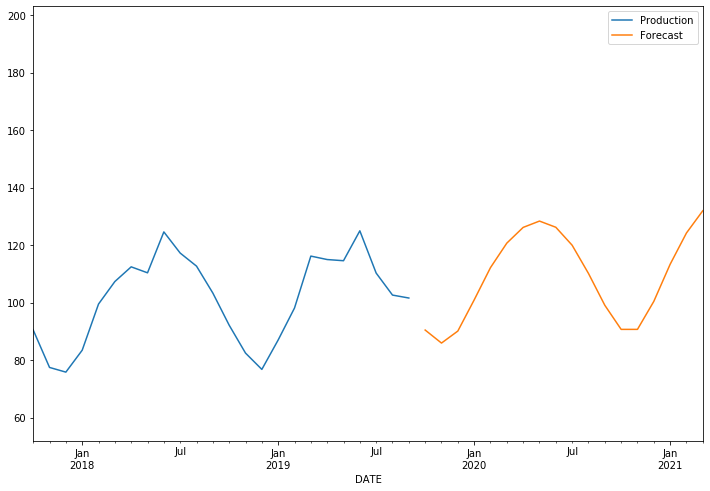

In [187]:
ax = df.plot(figsize=(12, 8))

plt.plot(figsize=(12, 8))
forecast_df.plot(ax=ax)
plt.xlim('2017-10-31','2021-03-31')